In [1]:
import numpy as np 
import pandas as pd
from numpy import savetxt
from matplotlib import pyplot as plt
import scipy.stats as st

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV  
from sklearn import preprocessing
from sklearn.metrics import balanced_accuracy_score as bal_accuracy
from sklearn.model_selection import KFold

import asgl 

## Importing Data 

In [2]:
data = pd.read_csv('/Users/hughtillmanjamesjr./Desktop/Research/DL_Elbow_Logging/Fall 2022/Clustering/Euclidean/Nov6_norm_stand/kmeans_L2_info_array_30_.csv', header = None)
Y = data.loc[:,1]
X = data.loc[:,2:]
X_cap = data.loc[:,2]
X_clust = data.loc[:,11:]

#normalizing
min_max_scaler = preprocessing.MinMaxScaler()
X_norm = min_max_scaler.fit_transform(X_clust)
#X_norm = min_max_scaler.fit_transform(X)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.33, random_state=0)

# savetxt('/Users/hughtillmanjamesjr./Desktop/Wash U Engineering/2022-2023/Fall 2022/Topics in Stat - ML/Project/X_train.csv', X_train, delimiter=',')
# savetxt('/Users/hughtillmanjamesjr./Desktop/Wash U Engineering/2022-2023/Fall 2022/Topics in Stat - ML/Project/X_test.csv', X_test, delimiter=',')
# savetxt('/Users/hughtillmanjamesjr./Desktop/Wash U Engineering/2022-2023/Fall 2022/Topics in Stat - ML/Project/y_train.csv', y_train, delimiter=',')
# savetxt('/Users/hughtillmanjamesjr./Desktop/Wash U Engineering/2022-2023/Fall 2022/Topics in Stat - ML/Project/y_test.csv', y_test, delimiter=',')

## Pearson Correlation Coefficient 

In [3]:
#pd.DataFrame(np.corrcoef(X_train.T))
sub_data = data.loc[:,1:]
sub_data.corr()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
1,1.000000,-0.192000,0.028072,0.033332,0.693835,0.093519,0.265218,0.230291,0.224367,-0.255230,...,0.238289,-0.141079,-0.014041,-0.122167,-0.182019,-0.167571,-0.043977,-0.321889,0.260855,-0.172229
2,-0.192000,1.000000,-0.004576,-0.002516,-0.276600,-0.052171,-0.195711,-0.206691,-0.010387,0.152875,...,0.408296,0.339493,0.560328,0.631811,0.516253,0.315326,0.418234,0.631251,-0.070284,0.494303
3,0.028072,-0.004576,1.000000,0.999635,0.115671,0.981838,0.148160,0.132954,0.011847,0.436662,...,0.057824,-0.055608,0.002281,0.139223,0.082991,-0.169752,0.033049,-0.017337,0.231881,0.115093
4,0.033332,-0.002516,0.999635,1.000000,0.115602,0.978863,0.144013,0.127622,0.010173,0.430959,...,0.062134,-0.054072,0.002888,0.141646,0.084914,-0.166304,0.037505,-0.017420,0.230313,0.118114
5,0.693835,-0.276600,0.115671,0.115602,1.000000,0.235160,0.238894,0.257863,0.237655,-0.018931,...,0.153915,0.056141,-0.094497,-0.072074,-0.109221,-0.220223,-0.115186,-0.307936,0.187330,-0.282353
6,0.093519,-0.052171,0.981838,0.978863,0.235160,1.000000,0.196263,0.188561,0.056667,0.437328,...,0.020962,-0.051911,-0.003344,0.126638,0.043272,-0.201778,-0.024720,-0.024290,0.264607,0.048090
7,0.265218,-0.195711,0.148160,0.144013,0.238894,0.196263,1.000000,0.989281,0.722834,0.160087,...,-0.093445,0.099466,-0.231918,0.029693,0.217328,-0.447725,0.135681,-0.194180,0.654221,-0.095970
8,0.230291,-0.206691,0.132954,0.127622,0.257863,0.188561,0.989281,1.000000,0.730466,0.217428,...,-0.079379,0.126370,-0.250841,0.028196,0.237765,-0.466282,0.143559,-0.203930,0.622073,-0.126762
9,0.224367,-0.010387,0.011847,0.010173,0.237655,0.056667,0.722834,0.730466,1.000000,0.065224,...,0.048653,0.209222,-0.106415,0.064280,0.248623,-0.332443,0.177048,-0.086194,0.473402,-0.078167
10,-0.255230,0.152875,0.436662,0.430959,-0.018931,0.437328,0.160087,0.217428,0.065224,1.000000,...,0.101415,0.279416,-0.149579,0.207532,0.480209,-0.040215,0.207686,-0.042101,0.030940,0.070622


## L1 Regularized Logistic Regression Over Range of Lambda

In [4]:
alphas = np.linspace(0.001,500,100000)
#alphas = np.linspace(1,100, 20)
LogR_L1 = LogisticRegression(max_iter = 10000, penalty = 'l1', solver = 'saga')
coefs = []
scores = []
errors = []

for a in alphas:
    LogR_L1.set_params(C=(1/a))
    LogR_L1.fit(X_train, y_train)
    pred = LogR_L1.predict(X_train)
    error = (1/len(pred))*np.sum(pred==y_train)
    
    scores.append(LogR_L1.score(X_train, y_train))
    coefs.append(LogR_L1.coef_[0,:])
    errors.append(error)

KeyboardInterrupt: 

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda', fontsize = 15)
plt.ylabel('Coefficients', fontsize = 15)
plt.title('L1 Regularized Coefficients as a Function of Lambda', fontsize = 15)
plt.savefig('coefficients_lambda.png', bbox_inches='tight')

In [ ]:
ax = plt.gca()
ax.plot(alphas, scores)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.title('L1 Regularized Model Accuracy as a Function of Lambda')

In [ ]:
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.title('L1 Regularized Logistic Regression Miss-Classification Error', fontsize = 15)

### 5-Fold Cross Validation to Find Optimal Penalization Parameter 

In [19]:
#defining model
LogR_L1 = LogisticRegression(max_iter = 10000, penalty = 'l1', solver = 'saga')

#range of regularization parameters to search
alphas = np.linspace(0.01,500,100000)
#alphas = np.linspace(1,100,5)

#5-fold CV for each regularization parameter
kf = KFold(n_splits=5)
errors = []
for a in alphas:
    fold_errors = []
    for train_index, test_index in kf.split(X_train):
        #getting CV index
        x_tr, x_te = X_train[train_index], X_train[test_index]
        y_tr, y_te = np.expand_dims(y_train, -1)[train_index], np.expand_dims(y_train, -1)[test_index]
        #y_tr, y_te = y_train[train_index], y_train[test_index]

        #fitting model
        LogR_L1.set_params(C=(1/a))
        LogR_L1.fit(x_tr, y_tr[:,0])
        pred = LogR_L1.predict(x_te)
        #fold_errors.append((1/len(pred))*np.count_nonzero(pred*y_te))
        fold_errors.append((1/len(pred))*np.sum(pred!=y_te))
    errors.append(fold_errors)

In [20]:
errors_arr = np.array(errors)
avg_errors = np.mean(errors_arr, 1)
errors = pd.DataFrame(errors_arr, columns = ['Fold 1 Error', 'Fold 2 Error', 'Fold 3 Error', 'Fold 4 Error', 'Fold 5 Error'])
avg_errors = pd.DataFrame(avg_errors, columns = ['Avg Error'])
lambdas = pd.DataFrame(alphas, columns = ['Lambda'])
cv_results = pd.concat([lambdas, errors, avg_errors], axis = 1)

In [21]:
non_zero_idx = cv_results.index[cv_results['Avg Error'] > 0].tolist()
cv_results_non_zero = cv_results.loc[non_zero_idx]
cv_results_non_zero = cv_results_non_zero.drop_duplicates(subset = ['Fold 1 Error', 'Fold 2 Error', 'Fold 3 Error', 'Fold 4 Error', 'Fold 5 Error', 'Avg Error'])
lambda_cv = cv_results_non_zero.sort_values('Avg Error').iloc[0,0]
lambda_cv

5.919940899408994

## L1, L2, Elastic Net Logistic Regression
-Looking at Logistic Regression with same alpha to see consistancy with zero and non-zero coefficients 

-Finding confidence intervals for each coefficient value

Notes: 
-sklearn Logtistic Regression - smaller C constrain model, larger C gives model more freedom
-slide 27 Var Sel 1 - pick lambda to be much larger than n 
-since C = 1/lambda we want C to be much smaller than 1/24

## Running Logistic Regression with No Penalty, L1, L2, and Elastic Net Penalization

- found optimal alpha with CV
- multiplied by (lambda_cv*sqrt(log(p)))
- redoing Logistic Regression with new lambda boostraping to get Confidence Intervals and p-values of coefficients 
- this will give me p0
- using the optimal number of features, p0, to redo logistic regression with no penalization
- these coefficients will give me relevant importance.

In [22]:
#lambda_p0 = lambda_cv
lambda_p0 = lambda_cv*np.sqrt(np.log(X.shape[1]))
print(lambda_p0)

11.331023047668648


In [23]:
# configure bootstrap
n_iterations = 10000
n_size = int(len(X_train) * 0.50)

# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    x_tr, y_tr = resample(X_train, y_train, n_samples=n_size)

    # fit model
    model = LogisticRegression(penalty = 'l1', max_iter = 10000, solver = 'saga', C = 1/lambda_p0)
    model.fit(x_tr, y_tr)
    stats.append(model.coef_[0,:])

In [24]:
# confidence intervals
coef_stats = list()
stats = np.array(stats)
for i in range(stats.shape[1]):
    coef_stats.append([np.mean(stats[:,i]), st.t.interval(alpha=0.90, df=len(stats)-1, loc=np.mean(stats[:,i]), scale=st.sem(stats[:,i])), st.ttest_ind(stats[:,i], np.zeros(stats[:,i].shape)).statistic, st.ttest_ind(stats[:,i], np.zeros(stats[:,i].shape)).pvalue])

results = pd.DataFrame(coef_stats, columns = ['Mean', 'Confidence Interval', 'T-Statistic', 'P-Value']).sort_values('P-Value')
results

/opt/homebrew/Caskroom/miniforge/base/envs/genEnv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/opt/homebrew/Caskroom/miniforge/base/envs/genEnv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Mean,Confidence Interval,T-Statistic,P-Value
19,-0.000070,"(-0.00014375877565189605, 3.185494910153445e-06)",-1.573684,0.115576
2,0.000068,"(-9.035647412030138e-06, 0.00014536954686233185)",1.452478,0.146385
9,0.000028,"(-1.8184166107518606e-05, 7.456864987479644e-05)",1.000000,0.317323
28,0.000009,"(-5.822555145007203e-06, 2.387682082409134e-05)",1.000000,0.317323
0,0.000000,"(nan, nan)",NaN,NaN
1,0.000000,"(nan, nan)",NaN,NaN
3,0.000000,"(nan, nan)",NaN,NaN
4,0.000000,"(nan, nan)",NaN,NaN
5,0.000000,"(nan, nan)",NaN,NaN
6,0.000000,"(nan, nan)",NaN,NaN


In [25]:
#getting subset of features 
idx = results[results['P-Value'] >= 0].index.tolist()
p_0_L1 = pd.DataFrame(X_train).loc[:,idx]

## Leave-One-Out Feature Importance 
- iterate over features
    - train l1 regularized logistic regression classifier with p-1 features 
    - find one with the most miss-classification error - this gives features with more importance

In [26]:
#splitting training data in to a training and holdout test set to calculate risk
X_train_loo, X_test_loo, y_train_loo, y_test_loo = train_test_split(X_train, y_train, test_size=0.33, random_state=0)
risks = list()
errors = list()
for i in range(X_train.shape[1]):
    #selecting p-1 features
    selector = [x for x in range(X_train_loo.shape[1]) if x != i]
    x_tr_feat = X_train_loo[:, selector]
    x_te_feat = X_test_loo[:, selector]

    #----------Bootstrapped----------
    risks_boot = list()
    errors_boot = list()
    for i in range(10000):
        # prepare train and test sets
        x_tr_boot_all_feat, x_tr_boot_sel_feat, y_tr_boot = resample(X_train_loo, x_tr_feat, y_train_loo, n_samples=n_size)        
        
        #----------Feature Selected----------
        model = LogisticRegression(max_iter = 10000, solver = 'saga')
        #fitting model
        model.fit(x_tr_boot_sel_feat, y_tr_boot)
        pred_f = model.predict(x_te_feat)
        error = (1/len(pred_f))*np.sum(y_test_loo != pred_f)
        
        #----------All Features----------
        model = LogisticRegression(max_iter = 10000, solver = 'saga')
        #fitting model
        model.fit(x_tr_boot_all_feat, y_tr_boot)
        pred = model.predict(X_test_loo)

        risk = 0 
        for k in range(len(pred)):
            risk_f = ((y_test_loo.to_numpy()[k] - pred_f[k])** 2)
            risk_m = ((y_test_loo.to_numpy()[k] - pred[k])** 2)
            risk += (risk_f - risk_m)
        risk = (1/len(pred))*risk
        risks_boot.append(risk)
        errors_boot.append(error)
    risks.append(risks_boot)
    errors.append(errors_boot)

In [27]:
risks_arr = np.array(risks)
avg_risks = np.mean(risks_arr, 1)
stats = risks

errors_arr = np.array(errors)
print(errors_arr.shape)
avg_errors = np.mean(errors_arr, 1)


# confidence intervals
coef_stats = list()
for i in range(risks_arr.shape[0]):
    coef_stats.append([np.mean(risks_arr[i,:]), np.mean(errors_arr[i,:]), st.t.interval(alpha=0.90, df=len(risks_arr)-1, loc=np.mean(risks_arr[i,:]), scale=st.sem(risks_arr[i,:])), st.ttest_ind(risks_arr[i,:], np.zeros(risks_arr[i,:].shape)).statistic, st.ttest_ind(risks_arr[i,:], np.zeros(risks_arr[i,:].shape)).pvalue])

results = pd.DataFrame(coef_stats, columns = ['Avg Risk', 'Avg Error', 'Confidence Interval', 'T-Statistic', 'P-Value']).sort_values('Avg Risk', ascending = False)
results

(30, 10000)


,Avg Risk,Avg Error,Confidence Interval,T-Statistic,P-Value
28,0.031580,0.125215,"(0.031318699043928824, 0.03184130095607117)",205.351072,0.000000e+00
2,0.012376,0.106129,"(0.012197691673018962, 0.01255341943809215)",118.223220,0.000000e+00
19,0.007966,0.101673,"(0.007800080682589655, 0.0081317711692622)",81.612953,0.000000e+00
9,0.007387,0.101255,"(0.007216610695592636, 0.007556722637740697)",73.804436,0.000000e+00
27,0.005925,0.099964,"(0.005782245964977172, 0.0060681244053931984)",70.433029,0.000000e+00
4,0.005439,0.099247,"(0.005325454975929903, 0.005553063542588612)",81.209530,0.000000e+00
25,0.003879,0.097831,"(0.0037647602163389353, 0.003992276820698102)",57.930679,0.000000e+00
3,0.003181,0.097373,"(0.0030709386558808926, 0.0032905428256005884)",49.220218,0.000000e+00
13,0.001771,0.095688,"(0.0016981805356970454, 0.0018440416865251764)",41.263115,0.000000e+00
7,0.001444,0.095151,"(0.0012983218291393109, 0.0015890855782680967)",16.873052,1.951774e-63


['28', '2', '19', '9', '27', '4', '25', '3', '13', '7', '1', '15', '29', '18', '17', '12', '23', '26', '5', '10', '16', '22', '21', '11', '24', '6', '8', '0', '14', '20']


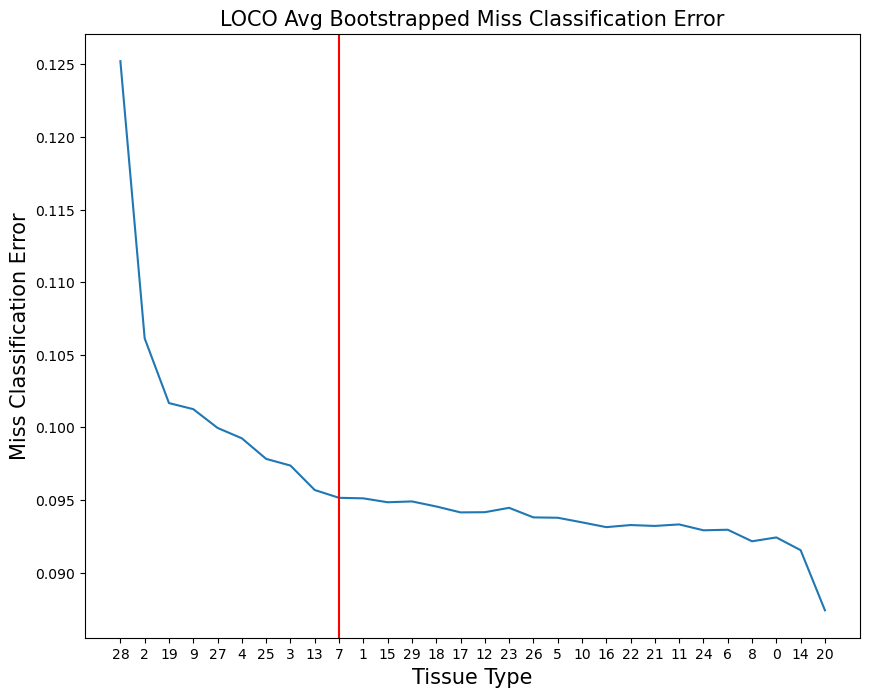

In [29]:
idx = results.index.to_numpy()
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
idx_str = [str(x) for x in idx]
avg_err = results.iloc[:,1].to_numpy()
print(idx_str)
ax = plt.gca()
ax.plot(avg_err)
plt.axis('tight')
ax.set_xticks(np.arange(len(idx)))
ax.set_xticklabels(idx_str)
plt.axvline(9, color = 'r')
plt.xlabel('Tissue Type', fontsize = 15)
plt.ylabel('Miss Classification Error', fontsize = 15)
plt.title('LOCO Avg Bootstrapped Miss Classification Error', fontsize = 15)
plt.savefig('/Users/hughtillmanjamesjr./Desktop/Wash U Engineering/2022-2023/Fall 2022/Topics in Stat - ML/Final/loco_plot.png')

## Inference on Test Data Set with Sparse Features

In [ ]:
#Full Model 
LogR = LogisticRegression(max_iter = 10000, solver = 'saga')
LogR.fit(X_train, y_train)
pred = LogR.predict(X_test)
print('--------------------------')
print('LogR with All Features')
#print('Coefficients', LogR.coef_[0,:])
print('Test Accuracy: ', (1/len(pred))*np.sum(y_test == pred))
print('Test Miss Class Error: ', (1/len(pred))*np.sum(y_test != pred))

#P0 from Logistic Regression Methods
LogR_L1 = LogisticRegression(max_iter = 10000, solver = 'saga')
LogR_L1.fit(X_train[:,[28, 19, 2, 9]], y_train)
pred_L1 = LogR_L1.predict(X_test[:,[28, 19, 2, 9]])
print('--------------------------')
print('LogR with L1 Penalized Features')
#print('Coefficients', LogR_L1.coef_[0,:])
print('Test Accuracy: ', (1/len(pred_L1))*np.sum(y_test == pred_L1))
print('Test Miss Class Error: ', (1/len(pred_L1))*np.sum(y_test != pred_L1))


#P0 from Leave-One-Out Methods
LogR_LOCO = LogisticRegression(max_iter = 10000, solver = 'saga')
LogR_LOCO.fit(X_train[:,[28, 2, 19, 9, 27, 4, 25, 3, 13, 15]], y_train)
pred_LOCO = LogR_LOCO.predict(X_test[:,[28, 2, 19, 9, 27, 4, 25, 3, 13, 15]])
print('--------------------------')
print('LogR with LOCO Features')
#print('Coefficients', LogR_L1.coef_[0,:])
print('Test Accuracy: ', (1/len(pred_LOCO))*np.sum(y_test == pred_LOCO))
print('Test Miss Class Error: ', (1/len(pred_LOCO))*np.sum(y_test != pred_LOCO))
